<a href="https://colab.research.google.com/github/AnAriz101/AnAriz101/blob/main/Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! gdown 1Y0WE4cqbZfdNEvFuWIDR_d6oDbHHNkly

Downloading...
From: https://drive.google.com/uc?id=1Y0WE4cqbZfdNEvFuWIDR_d6oDbHHNkly
To: /content/USE3L0712.RSK
100% 4.12M/4.12M [00:00<00:00, 165MB/s]


In [ ]:
! head /content/USE3L0712.RSK

31DEC2007
"BARRID ","TICKER","CUSIP   ","NAME                             ","HBTA","BETA","SRISK%","TRISK%","VOLTILTY","MOMENTUM","SIZE    ","SIZENONL","TRADEACT","GROWTH  ","EARNYLD ","VALUE   ","EARNVAR ","LEVERAGE","CURRSEN ","YIELD   ","NONESTU ","INDNAME1","IND1","WGT1%","INDNAME2","IND2","WGT2%","INDNAME3","IND3","WGT3%","INDNAME4","IND4","WGT4%","INDNAME5","IND5","WGT5%","PRICE   ","CAPITALIZATION  ","YLD%  ","SAP500","SAPVAL","SAPGRO","MIDCAP","MIDVAL","MIDGRO","SC600 ","SCVAL ","SCGRO ","E3ESTU"
"USA1131","IX    ","68633010","ORIX CORP                        ", 0.756, 1.343,  32.771,  39.733, 0.861,-1.043,-0.584, 0.092,-2.107,-0.436, 3.100, 0.841, 0.685, 2.215,-0.813,-0.451, 1.000,"FINSVCS ",  52,  34,"CONSTRUC",  19,  19,"INDSVCS ",  46,  17,"SECASSET",  51,  16,"LIFEINS ",  47,  14,    84.790,   15576262160.000,   0.978,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0
"USA1141","SAOL  ","80305010","SAO LUIS MINING INC              ", 0.632, 2.031,  75.64

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
barra_df = pd.read_csv('USE3L0712.RSK', skiprows=1)

In [ ]:
barra_df.columns = barra_df.columns.str.strip() # Solves 1
for col in barra_df.select_dtypes(include='object'): # Solves 2
  barra_df[col] = barra_df[col].str.strip()
barra_df = barra_df.replace(-999, np.nan) # Solves Issue 3

In [ ]:
from sqlalchemy import create_engine, Column, String, Integer, Float, TIMESTAMP, func
from sqlalchemy.ext.declarative import declarative_base

Base = declarative_base()

class FinancialData(Base):
    __tablename__ = 'financial_data'

    BARRID = Column(String(50), primary_key=True, nullable=False)  # Unique identifier
    TICKER = Column(String(10), nullable=False)  # Ticker symbol
    CUSIP = Column(String(10), nullable=False)  # CUSIP identifier
    NAME = Column(String(100), nullable=False)  # Company name
    HBTA = Column(Float)  # Financial metric
    BETA = Column(Float)
    SRISK = Column(Float)  # Risk metric
    TRISK = Column(Float)
    VOLTILITY = Column(Float)  # Volatility
    MOMENTUM = Column(Float)
    SIZE = Column(Float)
    SIZENONL = Column(Float)
    TRADEACT = Column(Float)
    GROWTH = Column(Float)
    EARNYLD = Column(Float)
    VALUE = Column(Float)
    EARNVAR = Column(Float)
    LEVERAGE = Column(Float)
    CURRSEN = Column(Float)
    YIELD = Column(Float, default=0.0)  # Default value
    NONESTU = Column(Integer, default=0)  # Default binary flag
    INDNAME1 = Column(String(100))  # Industry name
    IND1 = Column(Integer)  # Industry code
    WGT1 = Column(Float)  # Weight percentage
    INDNAME2 = Column(String(100))
    IND2 = Column(Integer)
    WGT2 = Column(Float)
    PRICE = Column(Float)  # Monetary value
    CAPITALIZATION = Column(Float)  # Market cap
    YLD = Column(Float)
    SAP500 = Column(Integer, default=0)  # Default binary flag
    SAPVAL = Column(Float)
    SCGRO = Column(Float)
    DATASET = Column(String(20), nullable=False)  # Dataset identifier

    created_at = Column(TIMESTAMP, server_default=func.now())  # Creation timestamp
    updated_at = Column(TIMESTAMP, server_default=func.now(), onupdate=func.now())  # Update timestamp

# Example for creating an SQLite database
engine = create_engine('sqlite:///financial_data.db')
Base.metadata.create_all(engine)

<ipython-input-69-cd14219757f0>:4: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [ ]:
dtype_dict = {
    "BARRID": String(50),
    "TICKER": String(10),
    "CUSIP": String(10),
    "NAME": String(100),
    "HBTA": Float,
    "BETA": Float,
    "SRISK": Float,
    "TRISK": Float,
    "VOLTILITY": Float,
    "MOMENTUM": Float,
    "SIZE": Float,
    "SIZENONL": Float,
    "TRADEACT": Float,
    "GROWTH": Float,
    "EARNYLD": Float,
    "VALUE": Float,
    "EARNVAR": Float,
    "LEVERAGE": Float,
    "CURRSEN": Float,
    "YIELD": Float,
    "NONESTU": Integer,
    "INDNAME1": String(100),
    "IND1": Integer,
    "WGT1": Float,
    "INDNAME2": String(100),
    "IND2": Integer,
    "WGT2": Float,
    "PRICE": Float,
    "CAPITALIZATION": Float,
    "YLD": Float,
    "SAP500": Integer,
    "SAPVAL": Float,
    "SCGRO": Float,
    "DATASET": String(20)
}


# Load DataFrame to SQL
barra_df.to_sql('barra_factors',
                engine,
                if_exists='replace',
                index=False,
                dtype=dtype_dict)

10214

In [ ]:
# 1. Basic count of records
count_query = """
SELECT COUNT(*) as total_records
FROM barra_factors;
"""
print("Total Records:")
print(pd.read_sql(count_query, engine)) # This is from the SQL database, not DataFrame

Total Records:
   total_records
0          10214


In [ ]:
#Dataset 2

In [ ]:
! gdown 1Z3vdd5m8uoB4whomq92DQbZHJiKYJc0v

Downloading...
From: https://drive.google.com/uc?id=1Z3vdd5m8uoB4whomq92DQbZHJiKYJc0v
To: /content/USE3L0812.RSK
100% 3.88M/3.88M [00:00<00:00, 158MB/s]


In [ ]:
! head USE3L0812.RSK

31DEC2008
"BARRID ","TICKER","CUSIP   ","NAME                             ","HBTA","BETA","SRISK%","TRISK%","VOLTILTY","MOMENTUM","SIZE    ","SIZENONL","TRADEACT","GROWTH  ","EARNYLD ","VALUE   ","EARNVAR ","LEVERAGE","CURRSEN ","YIELD   ","NONESTU ","INDNAME1","IND1","WGT1%","INDNAME2","IND2","WGT2%","INDNAME3","IND3","WGT3%","INDNAME4","IND4","WGT4%","INDNAME5","IND5","WGT5%","PRICE   ","CAPITALIZATION  ","YLD%  ","SAP500","SAPVAL","SAPGRO","MIDCAP","MIDVAL","MIDGRO","SC600 ","SCVAL ","SCGRO ","E3ESTU"
"USA1131","IX    ","68633010","ORIX CORP                        ", 1.540, 1.711,  51.076,  76.426, 0.874,-1.307,-1.135, 0.000,-2.032,-0.445, 4.286, 2.800, 1.190, 3.543, 0.413,-0.465, 1.000,"FINSVCS ",  52,  47,"INDSVCS ",  46,  28,"CONSTRUC",  19,  18,"LIFEINS ",  47,   7,"        ",   0,   0,    28.420,    5241614280.000,   1.559,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0
"USA1141","SAOL  ","80305010","SAO LUIS MINING INC              ", 5.000, 1.721, 100.23

In [ ]:
barra_df_2008 = pd.read_csv('USE3L0812.RSK',skiprows=1)
barra_df_2008.columns=barra_df_2008.columns.str.strip()
for col in barra_df_2008.select_dtypes(include='object').columns:
  barra_df_2008[col] = barra_df_2008[col].str.strip()

In [ ]:
from sqlalchemy.sql import text

try:
  with engine.connect() as conn:
      conn.execute(text("DROP TABLE barra_2008_pk;"))
except:
  0

# Create table with BARRID as primary key directly from DataFrame
create_pk_table = text("""
CREATE TABLE barra_2008_pk (
    BARRID TEXT PRIMARY KEY,
    TICKER TEXT,
    CUSIP TEXT,
    NAME TEXT,
    HBTA REAL,
    BETA REAL,
    "SRISK%" REAL,
    "TRISK%" REAL,
    VOLTILTY REAL,
    MOMENTUM REAL,
    SIZE REAL,
    SIZENONL REAL,
    TRADEACT REAL,
    GROWTH REAL,
    EARNYLD REAL,
    VALUE REAL,
    EARNVAR REAL,
    LEVERAGE REAL,
    CURRSEN REAL,
    YIELD REAL,
    NONESTU REAL,
    INDNAME1 TEXT,
    IND1 INTEGER,
    "WGT1%" INTEGER,
    INDNAME2 TEXT,
    IND2 INTEGER,
    "WGT2%" INTEGER,
    INDNAME3 TEXT,
    IND3 INTEGER,
    "WGT3%" INTEGER,
    INDNAME4 TEXT,
    IND4 INTEGER,
    "WGT4%" INTEGER,
    INDNAME5 TEXT,
    IND5 INTEGER,
    "WGT5%" INTEGER,
    PRICE REAL,
    CAPITALIZATION REAL,
    "YLD%" REAL,
    SAP500 INTEGER,
    SAPVAL INTEGER,
    SAPGRO INTEGER,
    MIDCAP INTEGER,
    MIDVAL INTEGER,
    MIDGRO INTEGER,
    SC600 INTEGER,
    SCVAL INTEGER,
    SCGRO INTEGER,
    E3ESTU INTEGER
);
""")

# Execute table creation and insert data
with engine.connect() as conn:
    conn.execute(create_pk_table)


In [ ]:
# Create table and load data
barra_df_2008.to_sql('barra_2008_pk',
                     engine,
                     if_exists='append', #not replace!
                     index=False,
                     dtype=dtype_dict)


9625

In [ ]:
from sqlalchemy import create_engine, Column, String, Integer, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

Base = declarative_base()

# Define barra_factors Table
class BarraFactors(Base):
    __tablename__ = 'barra_factors'

    BARRID = Column(String(50), primary_key=True)
    TICKER = Column(String(10))
    CUSIP = Column(String(10))
    NAME = Column(String(100))
    HBTA = Column(Float)
    BETA = Column(Float)
    SRISK = Column(Float)
    TRISK = Column(Float)
    VOLTILITY = Column(Float)
    MOMENTUM = Column(Float)
    SIZE = Column(Float)

# Define barra_2008_pk Table
class Barra2008PK(Base):
    __tablename__ = 'barra_2008_pk'

    BARRID = Column(String(50), primary_key=True)
    TICKER = Column(String(10))
    CUSIP = Column(String(10))
    NAME = Column(String(100))
    HBTA = Column(Float)
    BETA = Column(Float)
    SRISK = Column(Float)
    TRISK = Column(Float)
    VOLTILITY = Column(Float)
    MOMENTUM = Column(Float)
    SIZE = Column(Float)

# Create a session
engine = create_engine('sqlite:///financial_data.db')
Session = sessionmaker(bind=engine)
session = Session()


<ipython-input-78-363d7241f783>:5: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [ ]:
from sqlalchemy import inspect

inspector = inspect(engine)
columns = inspector.get_columns('barra_factors')

for column in columns:
    print(column['name'])


BARRID
TICKER
CUSIP
NAME
HBTA
BETA
SRISK%
TRISK%
VOLTILTY
MOMENTUM
SIZE
SIZENONL
TRADEACT
GROWTH
EARNYLD
VALUE
EARNVAR
LEVERAGE
CURRSEN
YIELD
NONESTU
INDNAME1
IND1
WGT1%
INDNAME2
IND2
WGT2%
INDNAME3
IND3
WGT3%
INDNAME4
IND4
WGT4%
INDNAME5
IND5
WGT5%
PRICE
CAPITALIZATION
YLD%
SAP500
SAPVAL
SAPGRO
MIDCAP
MIDVAL
MIDGRO
SC600
SCVAL
SCGRO
E3ESTU


In [ ]:
from sqlalchemy.sql import text

query = text("""
    -- First part: LEFT JOIN (All rows from barra_factors, matching rows from barra_2008_pk)
    SELECT
        bf.INDNAME1 AS Industry,
        (bf.BETA - b08.BETA) AS BETA_Change,
        (bf."VOLTILTY" - b08."VOLTILTY") AS VOLATILITY_Change,
        (bf.LEVERAGE - b08.LEVERAGE) AS LEVERAGE_Change,
        (bf.SIZE - b08.SIZE) AS SIZE_Change,
        (bf.VALUE - b08.VALUE) AS VALUE_Change
    FROM barra_factors bf
    LEFT JOIN barra_2008_pk b08
    ON bf.BARRID = b08.BARRID

    UNION

    -- Second part: RIGHT JOIN simulated using LEFT JOIN with reversed tables
    SELECT
        b08.INDNAME1 AS Industry,
        (bf.BETA - b08.BETA) AS BETA_Change,
        (bf."VOLTILTY" - b08."VOLTILTY") AS VOLATILITY_Change,
        (bf.LEVERAGE - b08.LEVERAGE) AS LEVERAGE_Change,
        (bf.SIZE - b08.SIZE) AS SIZE_Change,
        (bf.VALUE - b08.VALUE) AS VALUE_Change
    FROM barra_2008_pk b08
    LEFT JOIN barra_factors bf
    ON bf.BARRID = b08.BARRID;
""")

# Execute the query and process results
with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.fetchall()

    # Convert to a DataFrame for better analysis
    import pandas as pd

    df = pd.DataFrame(rows, columns=["Industry", "BETA_Change", "VOLATILITY_Change", "LEVERAGE_Change", "SIZE_Change", "VALUE_Change"])

In [ ]:
# Remove NaN values
df.dropna(inplace=True)
df

,Industry,BETA_Change,VOLATILITY_Change,LEVERAGE_Change,SIZE_Change,VALUE_Change
1,AIRLINES,-1.029,-2.700,-3.180,1.520,-4.723
2,AIRLINES,-0.696,-2.114,-3.309,1.481,-1.845
3,AIRLINES,-0.614,-0.853,-0.485,0.237,-0.627
4,AIRLINES,-0.563,-1.201,-0.087,0.337,-0.188
5,AIRLINES,-0.343,-1.263,1.046,-0.023,-1.342
...,...,...,...,...,...,...
9573,WIRELESS,0.059,1.583,1.828,-0.177,-0.475
9574,WIRELESS,0.199,1.870,0.926,-0.068,-0.424
9575,WIRELESS,0.206,2.164,-0.428,-0.130,1.066
9576,WIRELESS,0.265,1.734,-0.307,0.137,0.056


<ipython-input-120-7c8b56cd3026>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_filtered, x="Industry", y="Change", hue="Metric", ci=None)


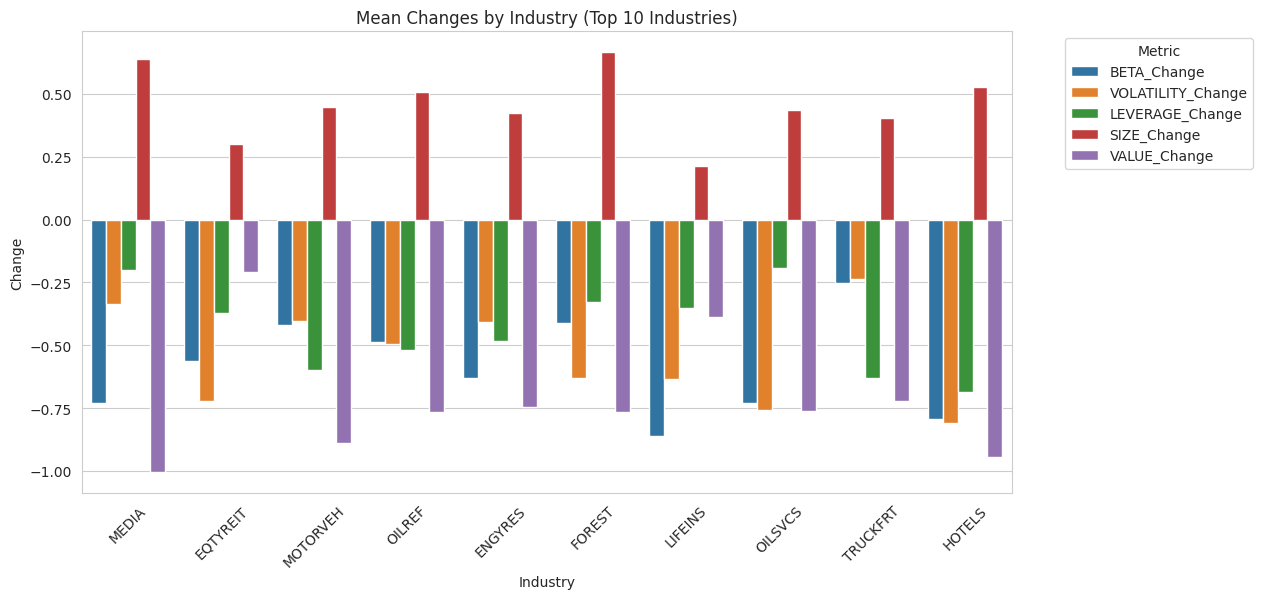

In [ ]:
import seaborn as sns

# Ensure numerical values in the melted dataframe
df_melted = df.melt(id_vars=["Industry"], var_name="Metric", value_name="Change")
df_melted["Change"] = pd.to_numeric(df_melted["Change"], errors="coerce")  # Convert to numeric, set errors to NaN

df_melted = df_melted.dropna()

# Aggregate industries: Show top 10 industries with the highest mean absolute changes
top_industries = (
    df_melted.groupby("Industry")["Change"].mean().abs().nlargest(10).index
)
df_filtered = df_melted[df_melted["Industry"].isin(top_industries)]

# Set style
sns.set_style("whitegrid")

# Barplot to compare mean changes across industries
plt.figure(figsize=(12, 6))
sns.barplot(data=df_filtered, x="Industry", y="Change", hue="Metric", ci=None)
plt.title("Mean Changes by Industry (Top 10 Industries)")
plt.xticks(rotation=45)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

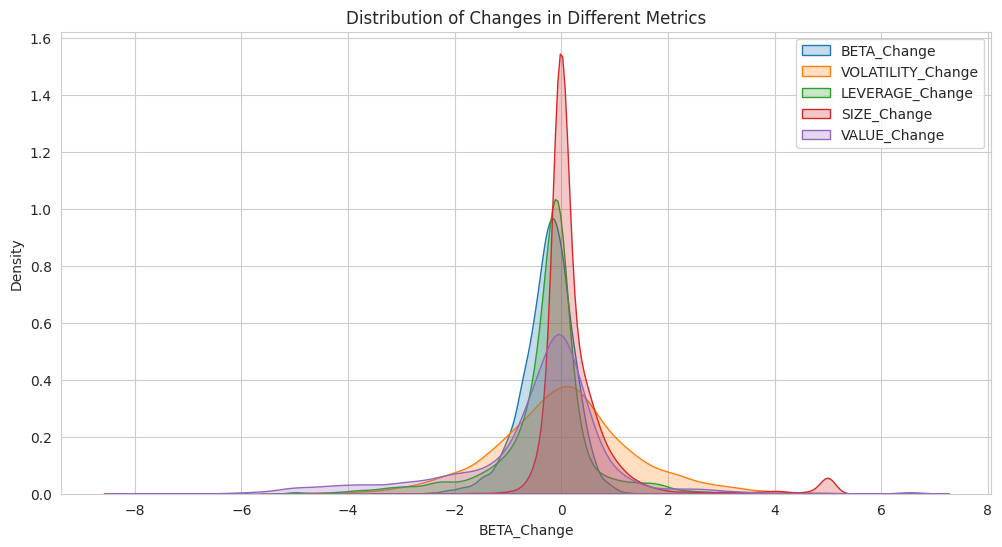

In [ ]:
plt.figure(figsize=(12, 6))
for col in ["BETA_Change", "VOLATILITY_Change", "LEVERAGE_Change", "SIZE_Change", "VALUE_Change"]:
    sns.kdeplot(df[col], label=col, fill=True)
plt.title("Distribution of Changes in Different Metrics")
plt.legend()
plt.show()


In [ ]:
#Compare High-Risk and Low-Risk Stocks

In [ ]:
from sqlalchemy import create_engine, text
import pandas as pd


# Define the SQL query using LEFT JOIN (No INNER JOIN)
query = text("""
    SELECT
        b08.INDNAME1 AS Industry,
        b08.BARRID,
        b08.TICKER,
        b08.NAME,
        (COALESCE(bf.BETA, 0) - b08.BETA) AS BETA_Change,
        (COALESCE(bf."VOLTILTY", 0) - b08."VOLTILTY") AS VOLATILITY_Change,
        (COALESCE(bf.LEVERAGE, 0) - b08.LEVERAGE) AS LEVERAGE_Change,
        (COALESCE(bf.SIZE, 0) - b08.SIZE) AS SIZE_Change,
        (COALESCE(bf.VALUE, 0) - b08.VALUE) AS VALUE_Change
    FROM barra_2008_pk b08
    LEFT JOIN barra_factors bf
    ON b08.BARRID = bf.BARRID;
""")

# Execute the query and fetch results
with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.fetchall()

# Convert to a DataFrame
df = pd.DataFrame(rows, columns=[
    "Industry", "BARRID", "TICKER", "NAME",
    "BETA_Change", "VOLATILITY_Change", "LEVERAGE_Change", "SIZE_Change", "VALUE_Change"
])

df = df.round(2)

# Adjust risk thresholds for better classification
high_risk_stocks = df[
    (df["BETA_Change"] > 0.75) |
    (df["VOLATILITY_Change"] > 0.5) |
    (df["LEVERAGE_Change"] > 1.5)
]

low_risk_stocks = df[
    (df["BETA_Change"] < -0.75) &
    (df["VOLATILITY_Change"] < -0.5) &
    (df["LEVERAGE_Change"] < -1.5)
]


pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.expand_frame_repr", False)  # Prevent wrapping

# Print results
print("\nHigh-Risk Stocks:")
print(high_risk_stocks)

print("\nLow-Risk Stocks:")
print(low_risk_stocks)


High-Risk Stocks:
      Industry   BARRID TICKER                          NAME  BETA_Change  VOLATILITY_Change  LEVERAGE_Change  SIZE_Change  VALUE_Change
1      CONSDUR  USA1141   SAOL           SAO LUIS MINING INC         0.31               1.98            -1.19        -0.02         -1.04
4     INFOSVCS  USA11B1   SWZH          SWEETSKINZ HLDGS INC        -0.02               1.22             0.31        -0.02          0.08
6     HOMEPROD  USA11D1   NTRZ                      NUTRACEA         0.38               1.21            -0.20         0.56         -1.61
7        BANKS  USA11G1   BSPA      BALLSTON SPA BANCORP INC        -0.38               1.11            -1.43         5.00         -1.29
11    CONSTRUC  USA11P1   IIDG  INNOVATIVE IMPACT DESIGN INC        -0.16               1.13             0.75        -0.02          1.14
...        ...      ...    ...                           ...          ...                ...              ...          ...           ...
9615   CMPTRSW  USAZZA

In [ ]:
# Define the SQL query using LEFT JOIN (No INNER JOIN)
query = text("""
    SELECT
        b08.INDNAME1 AS Industry,
        b08.BARRID,
        b08.TICKER,
        b08.NAME,
        (COALESCE(bf.BETA, 0) - b08.BETA) AS BETA_Change,
        (COALESCE(bf."VOLTILTY", 0) - b08."VOLTILTY") AS VOLATILITY_Change,
        (COALESCE(bf.LEVERAGE, 0) - b08.LEVERAGE) AS LEVERAGE_Change,
        (COALESCE(bf.SIZE, 0) - b08.SIZE) AS SIZE_Change,
        (COALESCE(bf.VALUE, 0) - b08.VALUE) AS VALUE_Change
    FROM barra_2008_pk b08
    LEFT JOIN barra_factors bf
    ON b08.BARRID = bf.BARRID
    LIMIT 100
""")

# Execute the query and fetch results
with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.fetchall()

# Convert to a DataFrame
df = pd.DataFrame(rows, columns=[
    "Industry", "BARRID", "TICKER", "NAME",
    "BETA_Change", "VOLATILITY_Change", "LEVERAGE_Change", "SIZE_Change", "VALUE_Change"
])

df = df.round(2)

# Adjust risk thresholds for better classification
hih_risk_stocks = df[
    (df["BETA_Change"] > 0.75) |
    (df["VOLATILITY_Change"] > 0.5) |
    (df["LEVERAGE_Change"] > 1.5)
]

low_rsk_stocks = df[
    (df["BETA_Change"] < -0.75) &
    (df["VOLATILITY_Change"] < -0.5) &
    (df["LEVERAGE_Change"] < -1.5)
]


pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.expand_frame_repr", False)  # Prevent wrapping

# Print results
print("\nHigh-Risk Stocks:")
print(hih_risk_stocks)

print("\nLow-Risk Stocks:")
print(low_rsk_stocks)


High-Risk Stocks:
    Industry   BARRID TICKER                            NAME  BETA_Change  VOLATILITY_Change  LEVERAGE_Change  SIZE_Change  VALUE_Change
1    CONSDUR  USA1141   SAOL             SAO LUIS MINING INC         0.31               1.98            -1.19        -0.02         -1.04
4   INFOSVCS  USA11B1   SWZH            SWEETSKINZ HLDGS INC        -0.02               1.22             0.31        -0.02          0.08
6   HOMEPROD  USA11D1   NTRZ                        NUTRACEA         0.38               1.21            -0.20         0.56         -1.61
7      BANKS  USA11G1   BSPA        BALLSTON SPA BANCORP INC        -0.38               1.11            -1.43         5.00         -1.29
11  CONSTRUC  USA11P1   IIDG    INNOVATIVE IMPACT DESIGN INC        -0.16               1.13             0.75        -0.02          1.14
12  WIRELESS  USA11Q2   LEAP          LEAP WIRELESS INTL INC         0.26               1.73            -0.31         0.14          0.06
15   DEFAERO  USA11V1 

In [ ]:
# Configure pandas display options
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.expand_frame_repr", False)  # Prevent wrapping

# Grouping high-risk stocks by Industry
high_risk_summary = hih_risk_stocks.groupby("Industry").agg(
    count=("BETA_Change", "count"),
    avg_beta_change=("BETA_Change", "mean"),
    avg_volatility_change=("VOLATILITY_Change", "mean"),
    avg_leverage_change=("LEVERAGE_Change", "mean")
)

# Grouping low-risk stocks by Industry
low_risk_summary = low_rsk_stocks.groupby("Industry").agg(
    count=("BETA_Change", "count"),
    avg_beta_change=("BETA_Change", "mean"),
    avg_volatility_change=("VOLATILITY_Change", "mean"),
    avg_leverage_change=("LEVERAGE_Change", "mean")
)

# Order high-risk industries by most risky (highest count)
high_risk_summary_sorted = high_risk_summary.sort_values(by="count", ascending=False)

# Order low-risk industries by least risky (highest count of low-risk stocks)
low_risk_summary_sorted = low_risk_summary.sort_values(by="count", ascending=False)

# Print results
print("\nHigh-Risk Stocks:")
print(high_risk_summary_sorted)

print("\nLow-Risk Stocks:")
print(low_risk_summary_sorted)


High-Risk Stocks:
          count  avg_beta_change  avg_volatility_change  avg_leverage_change
Industry                                                                    
INFOSVCS      8             0.14                   1.80                -0.09
BANKS         4            -0.02                   0.80                -0.60
BIOTECH       3             0.55                   1.40                -0.00
EQTYREIT      2            -0.19                   0.67                 1.07
RESTRNTS      2             0.19                   2.18                -0.72
WIRELESS      2             0.08                   1.28                -0.13
DEFAERO       2             0.61                   2.67                -0.06
CONSTRUC      2            -0.14                   1.07                -1.45
CONSDUR       2             0.43                   1.62                -0.67
HOMEPROD      1             0.38                   1.21                -0.20
INDPART       1            -0.23                   0.75  

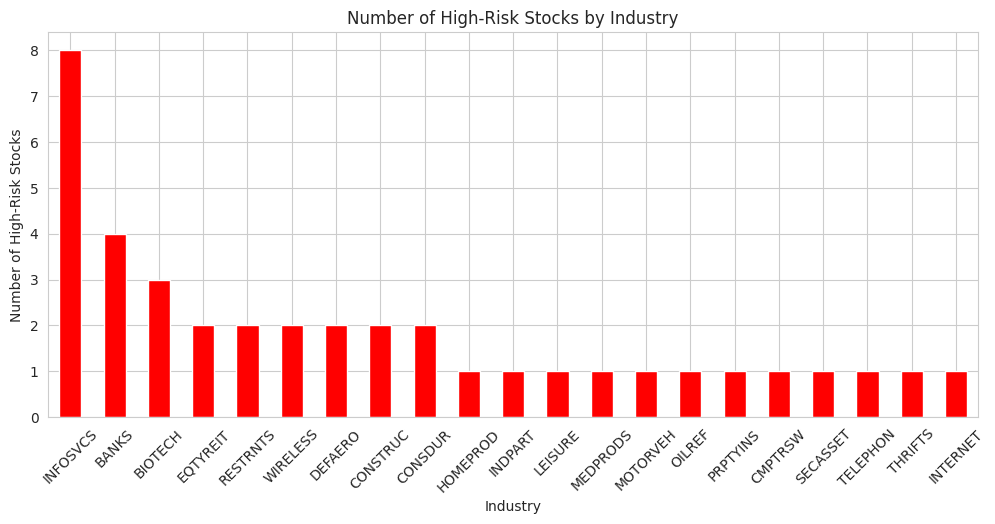

In [ ]:
# Plot High-Risk Stocks by Industry
plt.figure(figsize=(12, 5))
high_risk_summary_sorted["count"].plot(kind="bar", color="red", title="Number of High-Risk Stocks by Industry")
plt.xlabel("Industry")
plt.ylabel("Number of High-Risk Stocks")
plt.xticks(rotation=45)
plt.show()

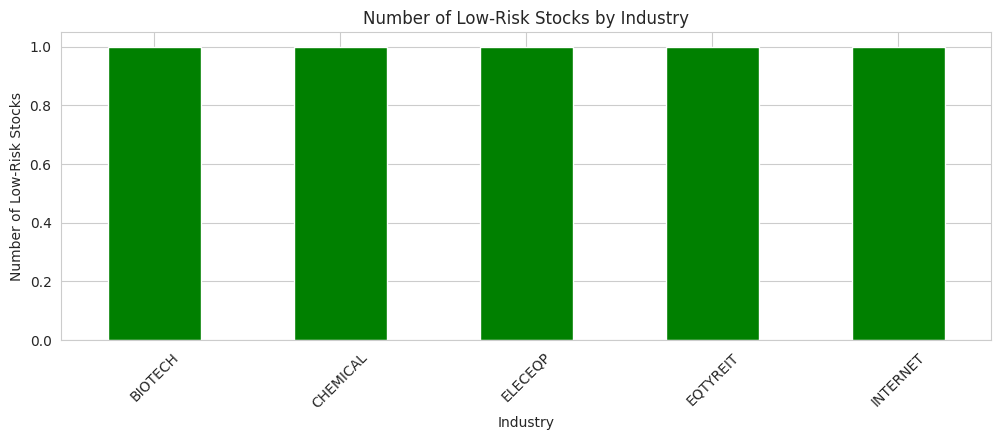

In [ ]:
# Plot Low-Risk Stocks by Industry
plt.figure(figsize=(12, 4))
low_risk_summary_sorted["count"].plot(kind="bar", color="green", title="Number of Low-Risk Stocks by Industry")
plt.xlabel("Industry")
plt.ylabel("Number of Low-Risk Stocks")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Industry Risk Comparision

In [ ]:
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define the SQL query using GROUP BY for industry-level risk comparison
query = text("""
    SELECT
        b08.INDNAME1 AS Industry,
        AVG(COALESCE(bf.BETA, 0)) AS avg_beta,
        AVG(COALESCE(bf.VOLTILTY, 0)) AS avg_volatility,
        AVG(COALESCE(bf.LEVERAGE, 0)) AS avg_leverage
    FROM barra_2008_pk b08
    LEFT JOIN barra_factors bf
    ON b08.BARRID = bf.BARRID
    GROUP BY b08.INDNAME1
    ORDER BY avg_volatility DESC;
""")

# Execute the query and fetch results
with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.fetchall()

# Convert to a Pandas DataFrame
industry_risk_df = pd.DataFrame(rows, columns=["Industry", "avg_beta", "avg_volatility", "avg_leverage"])

# Round numbers for readability
industry_risk_df = industry_risk_df.round(2)
print(industry_risk_df)

    Industry  avg_beta  avg_volatility  avg_leverage
0    BIOTECH      1.22            2.86          1.33
1   INTERNET      1.32            2.67          1.61
2       GOLD      0.81            2.66          1.26
3    CMPTRSW      1.20            2.48          1.54
4    FINSVCS      1.41            2.38          2.74
5    CMPTRHW      1.20            2.35          1.24
6      DRUGS      1.01            2.32          1.18
7    ELECEQP      1.25            2.32          1.36
8   INFOSVCS      1.17            2.30          1.70
9   ENTRTAIN      1.03            2.16          2.35
10  SPLTYRET      1.25            2.15          1.50
11    MINING      1.52            2.11          1.44
12  MEDPRODS      0.96            2.04          1.14
13  SEMICOND      1.27            2.03          0.95
14   LEISURE      1.14            2.02          1.69
15  WIRELESS      1.12            1.98          1.84
16   ENVSVCS      0.98            1.95          1.60
17  HEAVYELC      1.36            1.89        

Industry Risk Comparision


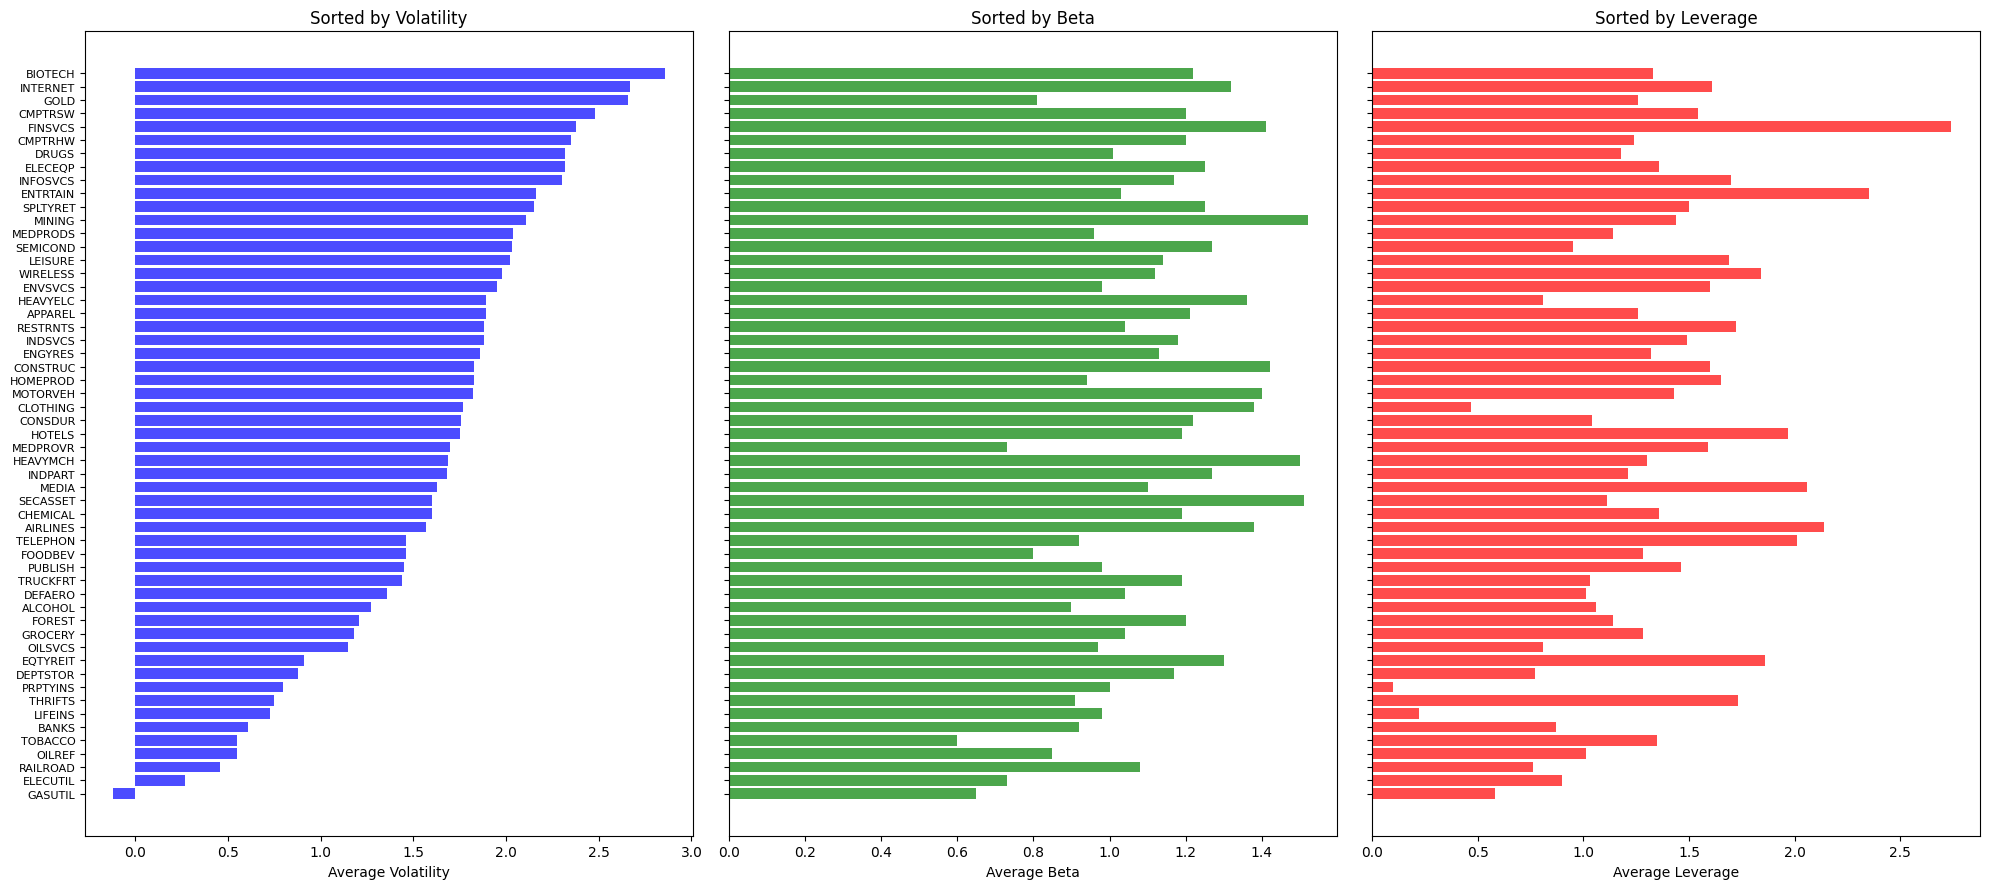

In [ ]:
print("Industry Risk Comparision")
# Define sorting orders
sorted_by_volatility = industry_risk_df.sort_values(by="avg_volatility", ascending=False)
sorted_by_beta = industry_risk_df.sort_values(by="avg_beta", ascending=False)
sorted_by_leverage = industry_risk_df.sort_values(by="avg_leverage", ascending=False)

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(20, 9), sharey=True)

# Colors for each category
colors = ["blue", "green", "red"]

# Plot sorted by volatility
axes[0].barh(sorted_by_volatility["Industry"], sorted_by_volatility["avg_volatility"], color=colors[0], alpha=0.7)
axes[0].set_xlabel("Average Volatility")
axes[0].set_title("Sorted by Volatility")

# Plot sorted by beta
axes[1].barh(sorted_by_beta["Industry"], sorted_by_beta["avg_beta"], color=colors[1], alpha=0.7)
axes[1].set_xlabel("Average Beta")
axes[1].set_title("Sorted by Beta")

# Plot sorted by leverage
axes[2].barh(sorted_by_leverage["Industry"], sorted_by_leverage["avg_leverage"], color=colors[2], alpha=0.7)
axes[2].set_xlabel("Average Leverage")
axes[2].set_title("Sorted by Leverage")

# Adjust y-axis text size
for ax in axes:
    ax.invert_yaxis()
    ax.tick_params(axis='y', labelsize=8)  # Reduce y-axis label text size

plt.tight_layout()
plt.show()

In [ ]:
# Compare Risk Levels

In [ ]:
# Define the SQL query using CASE to categorize stocks by risk
query = text("""
    SELECT
        b08.BARRID,
        b08.TICKER,
        b08.NAME,
        b08.INDNAME1 AS Industry,
        bf.BETA,
        bf.VOLTILTY,
        bf.LEVERAGE,
        CASE
            WHEN bf.BETA < 0.8 AND bf.VOLTILTY < 0.2 THEN 'Low Risk'
            WHEN bf.BETA BETWEEN 0.8 AND 1.2 AND bf.VOLTILTY BETWEEN 0.2 AND 0.4 THEN 'Medium Risk'
            ELSE 'High Risk'
        END AS risk_category
    FROM barra_2008_pk b08
    LEFT JOIN barra_factors bf
    ON b08.BARRID = bf.BARRID
    ORDER BY risk_category, bf.VOLTILTY DESC;
""")

# Execute the query and fetch results
with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.fetchall()

# Convert to a DataFrame
risk_df = pd.DataFrame(rows, columns=[
    "BARRID", "TICKER", "NAME", "Industry", "BETA", "VOLATILITY", "LEVERAGE", "Risk_Category"
])

# Round numeric columns for better readability
risk_df[["BETA", "VOLATILITY", "LEVERAGE"]] = risk_df[["BETA", "VOLATILITY", "LEVERAGE"]].round(2)
print(risk_df)

       BARRID TICKER                       NAME  Industry  BETA  VOLATILITY  LEVERAGE Risk_Category
0     USA1141   SAOL        SAO LUIS MINING INC   CONSDUR  2.03        5.00      1.79     High Risk
1     USA11V1   FRPT       FORCE PROTECTION INC   DEFAERO  2.32        5.00      0.18     High Risk
2     USA12P1   IMOT             INTERMOST CORP  INFOSVCS  1.84        5.00      0.50     High Risk
3     USA13C1   BLTA       BALTIA AIR LINES INC  AIRLINES  2.08        5.00      3.42     High Risk
4     USA13I1   HPLF  HEPALIFE TECHNOLOGIES INC  CONSTRUC  2.16        5.00      1.04     High Risk
...       ...    ...                        ...       ...   ...         ...       ...           ...
9620  USAP1O1    WMB       WILLIAMS COS INC DEL   ENGYRES  1.08        0.21      0.49   Medium Risk
9621  USAPIO1    TWX            TIME WARNER INC     MEDIA  1.07        0.21      0.50   Medium Risk
9622  USAC841    CNA              CNA FINL CORP  PRPTYINS  1.06        0.20     -0.08   Medium Risk


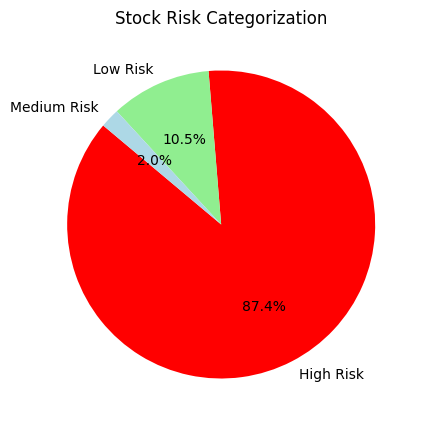

In [ ]:
risk_counts = risk_df["Risk_Category"].value_counts()


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
risk_counts.plot.pie(autopct="%1.1f%%", colors=["red", "lightgreen", "lightblue"], startangle=140)
plt.title("Stock Risk Categorization")
plt.ylabel("")
plt.show()

In [ ]:
# Estimate the potential loss in value over a given time frame.

print("Value at Risk (VaR)")
var_95 = np.percentile(df["VALUE_Change"], 5)  # 5% worst-case scenario
print(f"95% VaR: {var_95}")

Value at Risk (VaR)
95% VaR: -3.67


<Axes: title={'center': 'Average Leverage by Industry'}, xlabel='Industry'>

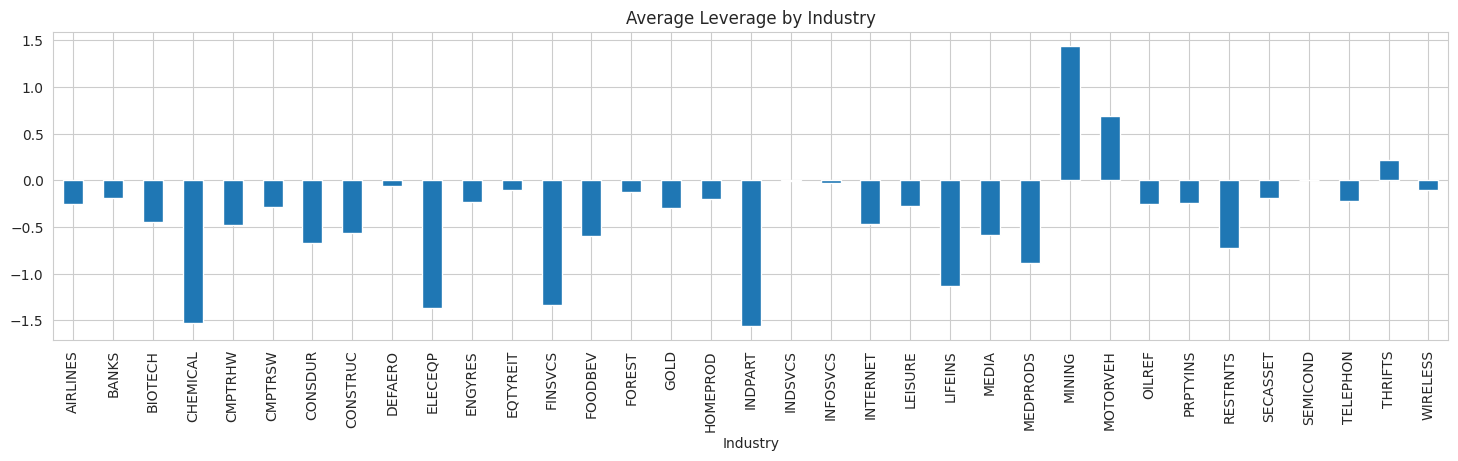

In [ ]:
#Leverage Risk Analysis

plt.figure(figsize=(18, 4))  # Adjust width and height as needed

df.groupby("Industry")["LEVERAGE_Change"].mean().plot(kind="bar", title="Average Leverage by Industry")


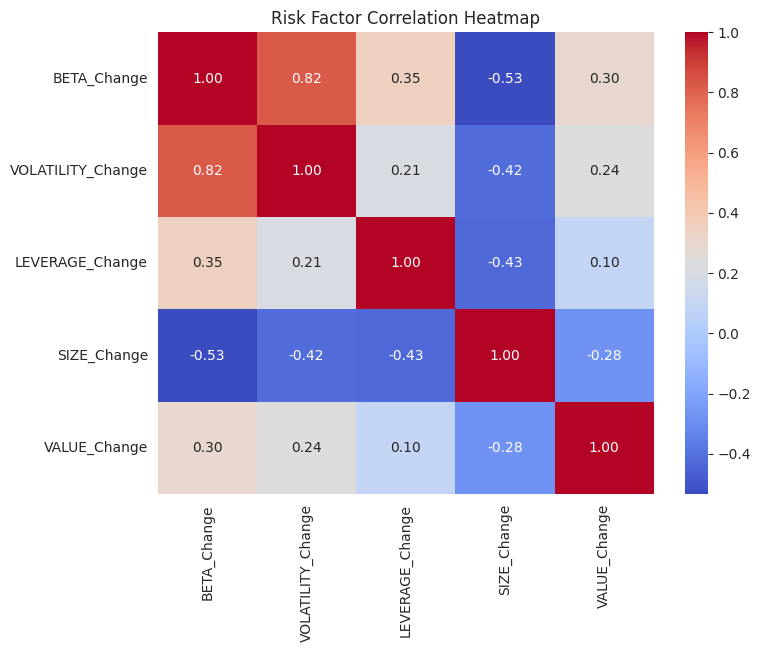

In [ ]:
#Dependency Risks

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df[["BETA_Change", "VOLATILITY_Change", "LEVERAGE_Change", "SIZE_Change", "VALUE_Change"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Risk Factor Correlation Heatmap")
plt.show()


In [ ]:
# Select relevant risk-related features
risk_features = df[["BETA_Change", "VOLATILITY_Change", "LEVERAGE_Change"]]

# Handle missing values (if any)
risk_features = risk_features.dropna()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize features to have mean=0 and variance=1 (important for K-Means)
scaler = StandardScaler()
risk_features_scaled = scaler.fit_transform(risk_features)

# Convert back to DataFrame for readability
risk_features_scaled = pd.DataFrame(risk_features_scaled, columns=risk_features.columns)


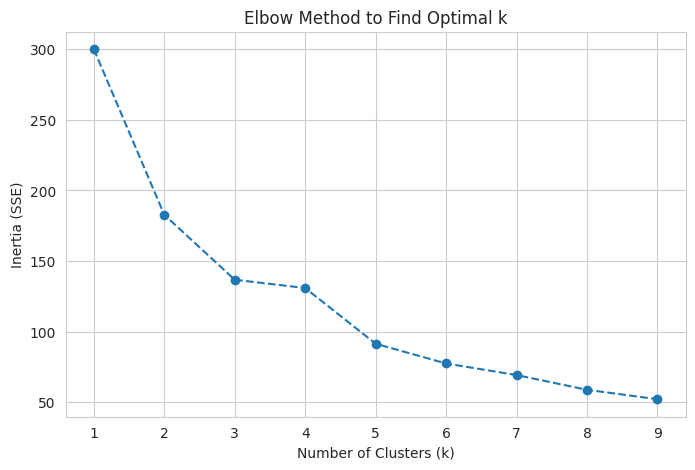

In [ ]:
# Try different cluster numbers
inertia = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(risk_features_scaled)
    inertia.append(kmeans.inertia_)  # Inertia = sum of squared distances to closest centroid

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method to Find Optimal k")
plt.show()


In [ ]:
# Apply K-Means with the chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Risk_Cluster"] = kmeans.fit_predict(risk_features_scaled)

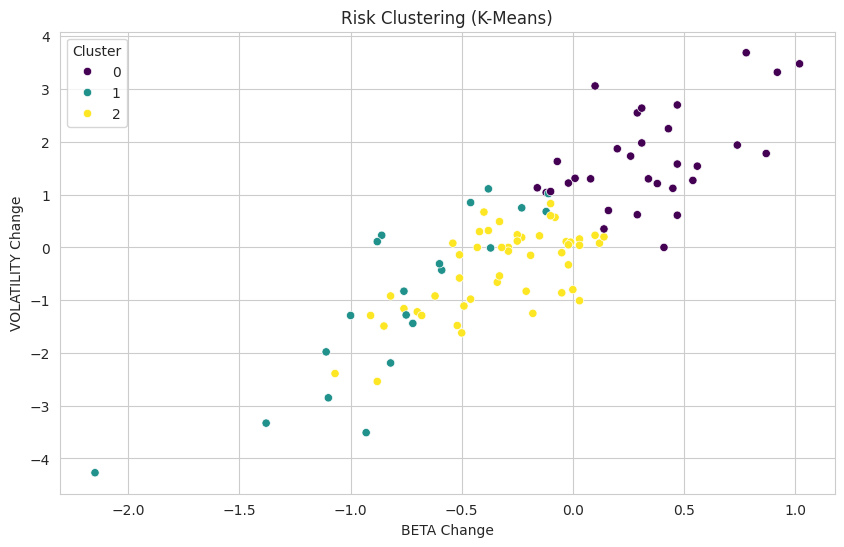

In [ ]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="BETA_Change", y="VOLATILITY_Change", hue="Risk_Cluster", palette="viridis")
plt.title("Risk Clustering (K-Means)")
plt.xlabel("BETA Change")
plt.ylabel("VOLATILITY Change")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Summary statistics for each cluster
cluster_summary = df.groupby("Risk_Cluster")[["BETA_Change", "VOLATILITY_Change", "LEVERAGE_Change"]].mean()
print(cluster_summary)

              BETA_Change  VOLATILITY_Change  LEVERAGE_Change
Risk_Cluster                                                 
0                    0.34               1.68            -0.00
1                   -0.77              -0.95            -1.69
2                   -0.32              -0.41             0.03


**Cluster 0** represents **moderate-risk** firms with increasing volatility (1.78) and a slight rise in market sensitivity (0.30), but stable leverage (0.03).

 **Cluster 2 **indicates **high-risk** firms with significantly decreasing beta (-0.95) and leverage (-2.58)

<ipython-input-220-6131797b332c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Risk_Cluster"], palette="coolwarm")


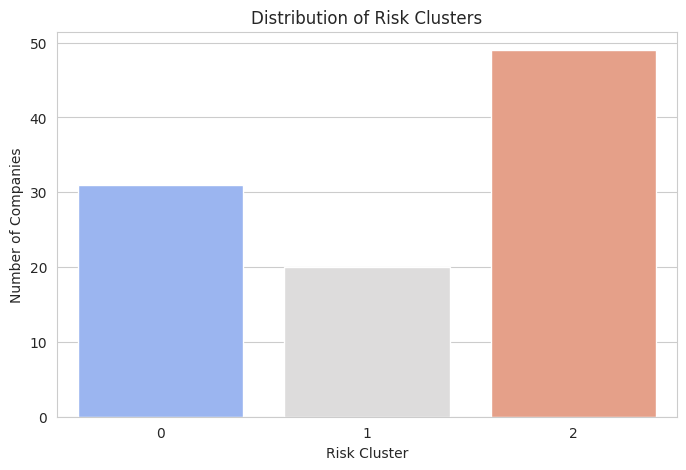

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Risk_Cluster"], palette="coolwarm")
plt.title("Distribution of Risk Clusters")
plt.xlabel("Risk Cluster")
plt.ylabel("Number of Companies")
plt.show()

In [ ]:
cluster_industry_counts = df.groupby('Risk_Cluster')['Industry'].nunique()

# Print the result
print("Count of Unique Industries in Each Cluster:")
print(cluster_industry_counts)

Count of Unique Industries in Each Cluster:
Risk_Cluster
0    19
1    14
2    25
Name: Industry, dtype: int64


In [ ]:
cluster_industry_names = df.groupby('Risk_Cluster')['Industry'].apply(list)
print("Industries in Each Cluster:")
print(cluster_industry_names)

Industries in Each Cluster:
Risk_Cluster
0                                                                                                                                                                [CONSDUR, INFOSVCS, HOMEPROD, CONSTRUC, WIRELESS, DEFAERO, EQTYREIT, INFOSVCS, AIRLINES, LEISURE, SECASSET, BIOTECH, BIOTECH, BANKS, THRIFTS, BIOTECH, RESTRNTS, OILREF, INFOSVCS, INTERNET, DEFAERO, INFOSVCS, CONSTRUC, INFOSVCS, CONSDUR, MEDPRODS, PRPTYINS, BANKS, INFOSVCS, TELEPHON, INFOSVCS]
1                                                                                                                                                                                                                                                                             [FINSVCS, BANKS, CMPTRHW, ELECEQP, ELECEQP, ELECEQP, CHEMICAL, INTERNET, CONSTRUC, EQTYREIT, ELECEQP, BANKS, INFOSVCS, INDPART, INFOSVCS, MEDPRODS, CMPTRSW, BIOTECH, LIFEINS, MEDPRODS]
2    [SEMICOND, MEDIA, INFOSVCS, INTERNET, CMPTRS

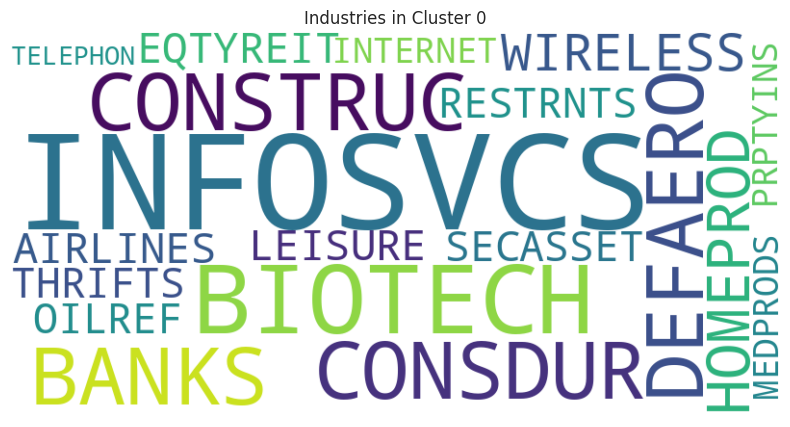

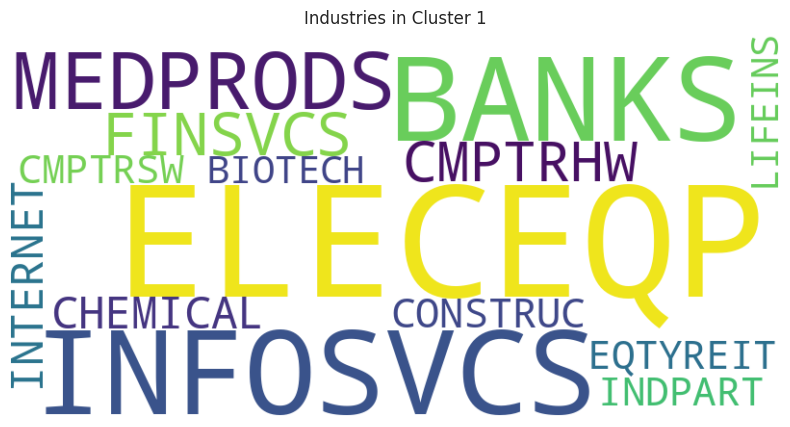

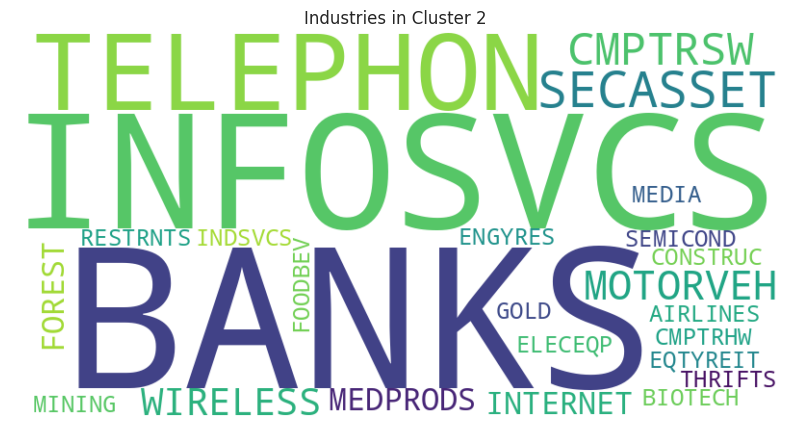

In [ ]:
from wordcloud import WordCloud

# Combine industries for each cluster
for cluster, industries in cluster_industry_names.items():
    text = ' '.join(industries)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Industries in Cluster {cluster}")
    plt.axis('off')
    plt.show()

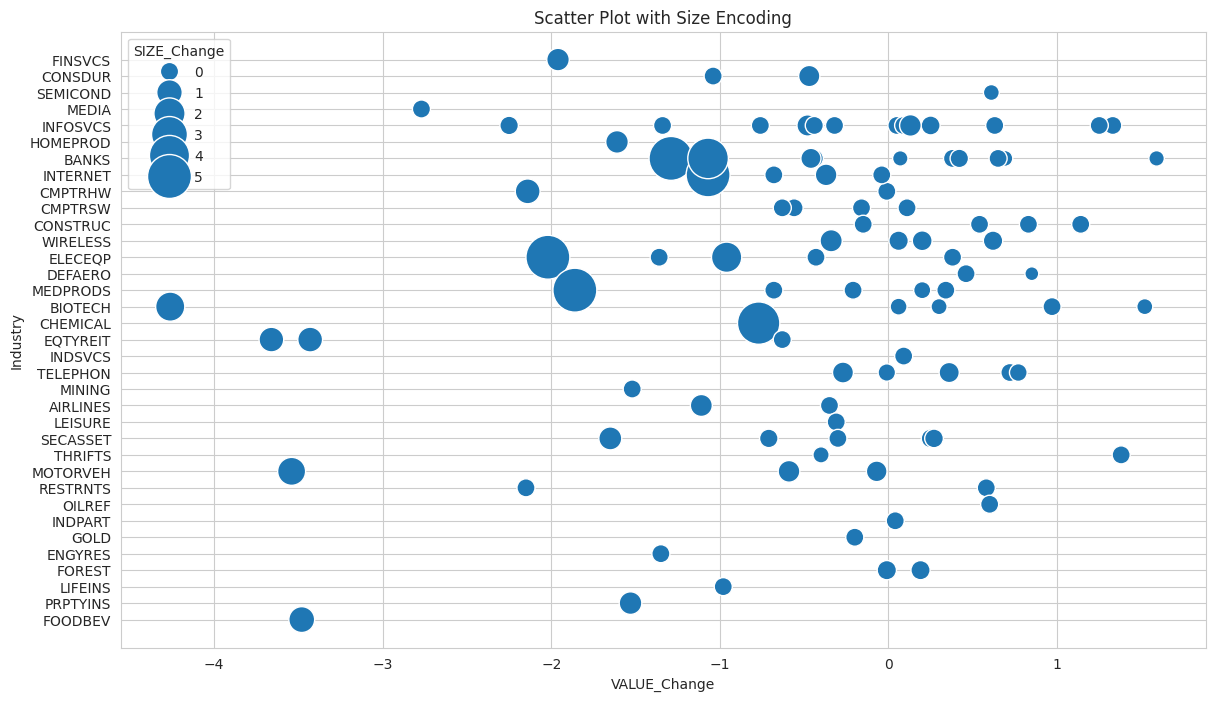

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='VALUE_Change', y='Industry', size='SIZE_Change', sizes=(100, 1000))
plt.title('Scatter Plot with Size Encoding')
plt.show()

    Industry   BARRID TICKER                            NAME  BETA_Change  VOLATILITY_Change  LEVERAGE_Change  SIZE_Change  VALUE_Change
7      BANKS  USA11G1   BSPA        BALLSTON SPA BANCORP INC        -0.38               1.11            -1.43         5.00         -1.29
13   ELECEQP  USA11T1   HPNN                      HOP ON INC        -2.15              -4.27            -2.84         5.00         -2.02
28  INTERNET  USA1341   IPZI                    IPTIMIZE INC        -1.38              -3.33            -2.12         5.00         -1.07
71  MEDPRODS  USA15Q1   VMTF              VMT SCIENTIFIC INC        -0.86               0.23            -3.13         5.00         -1.86
21  CHEMICAL  USA12G1   ANNO  AMERICAN NANO SILICON TECH INC        -1.00              -1.29            -1.53         4.58         -0.77
52     BANKS  USA14K1   CATC               CAMBRIDGE BANCORP        -0.46               0.85            -1.11         4.12         -1.07
16   ELECEQP  USA1231   RPMV             

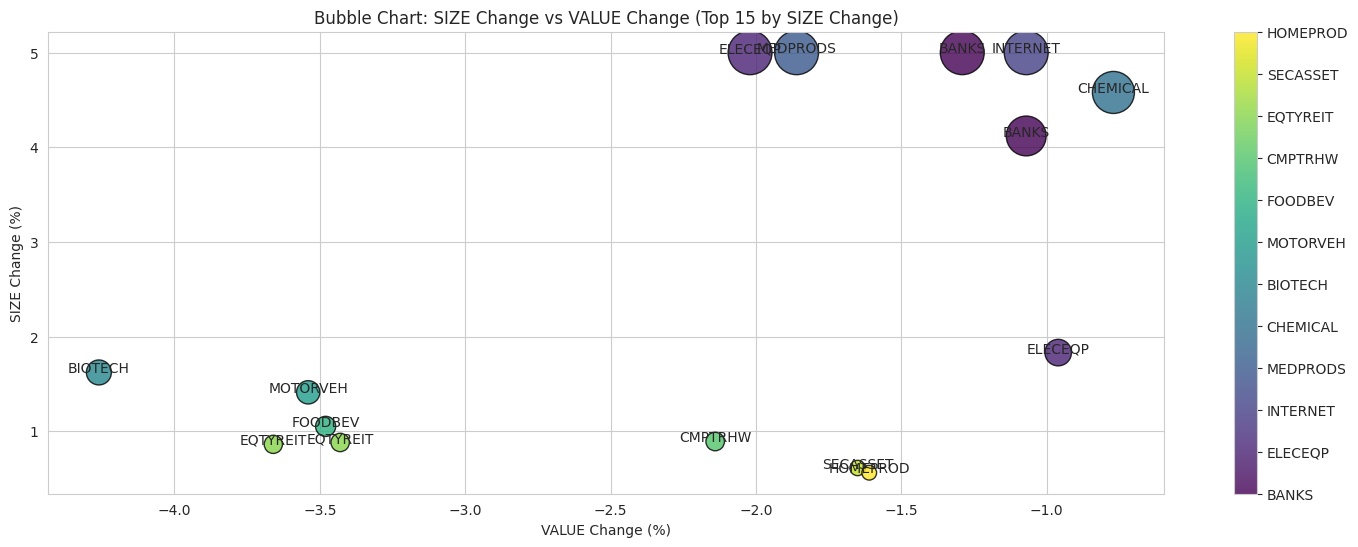

In [ ]:
# Sort by a specific column (e.g., 'SIZE_change' or 'VALUE_change') and select top 15
df_top15 = df.nlargest(15, 'SIZE_Change')  # Change 'SIZE_change' to 'VALUE_change' if needed
print(df_top15)

# Create the bubble chart
plt.figure(figsize=(18, 6))
plt.scatter(
    x=df_top15['VALUE_Change'],  # X-axis: VALUE_change
    y=df_top15['SIZE_Change'],   # Y-axis: SIZE_change
    s=df_top15['SIZE_Change'].abs() * 200,  # Bubble size: Absolute SIZE_change (scaled for visibility)
    c=pd.factorize(df_top15['Industry'])[0],  # Bubble color: Industry (categorical)
    cmap='viridis',  # Color map
    alpha=0.8,       # Transparency
    edgecolors='black'  # Bubble edges
)

# Add labels and title
plt.xlabel('VALUE Change (%)')
plt.ylabel('SIZE Change (%)')
plt.title('Bubble Chart: SIZE Change vs VALUE Change (Top 15 by SIZE Change)')

# Add a color bar for industries
cbar = plt.colorbar()
cbar.set_ticks(range(len(df_top15['Industry'].unique())))
cbar.set_ticklabels(df_top15['Industry'].unique())

# Add annotations for industries
for i, row in df_top15.iterrows():
    plt.text(row['VALUE_Change'], row['SIZE_Change'], row['Industry'], fontsize=10, ha='center')

# Show the plot
plt.show()